What is needed: Install software packages: (1) Python 3.X (2) Selenium pip install -U selenium (3) IDE is needed, but not required.

Browser drivers are required: Will use Chrome Driver: https://sites.google.com/a/chromium.org/chromedriver/downloads

Why Selenium? 


In [1]:
#Selenium Test
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import re
import pandas as pd
import os

An implicit wait is to tell Web Driver to poll the DOM for a certain amount of time, the default setting is 0. Once set, the implicit wait is set for the life of the Web Driver object instance, thus Selenium will wait for a certain amount of time before throwing an exception given an element is not found on the page. 

# What is the find_element_by_*?
driver.find_element_by_id('MainContent_uxLevel1_Agencies_uxAgencyBtn_33')


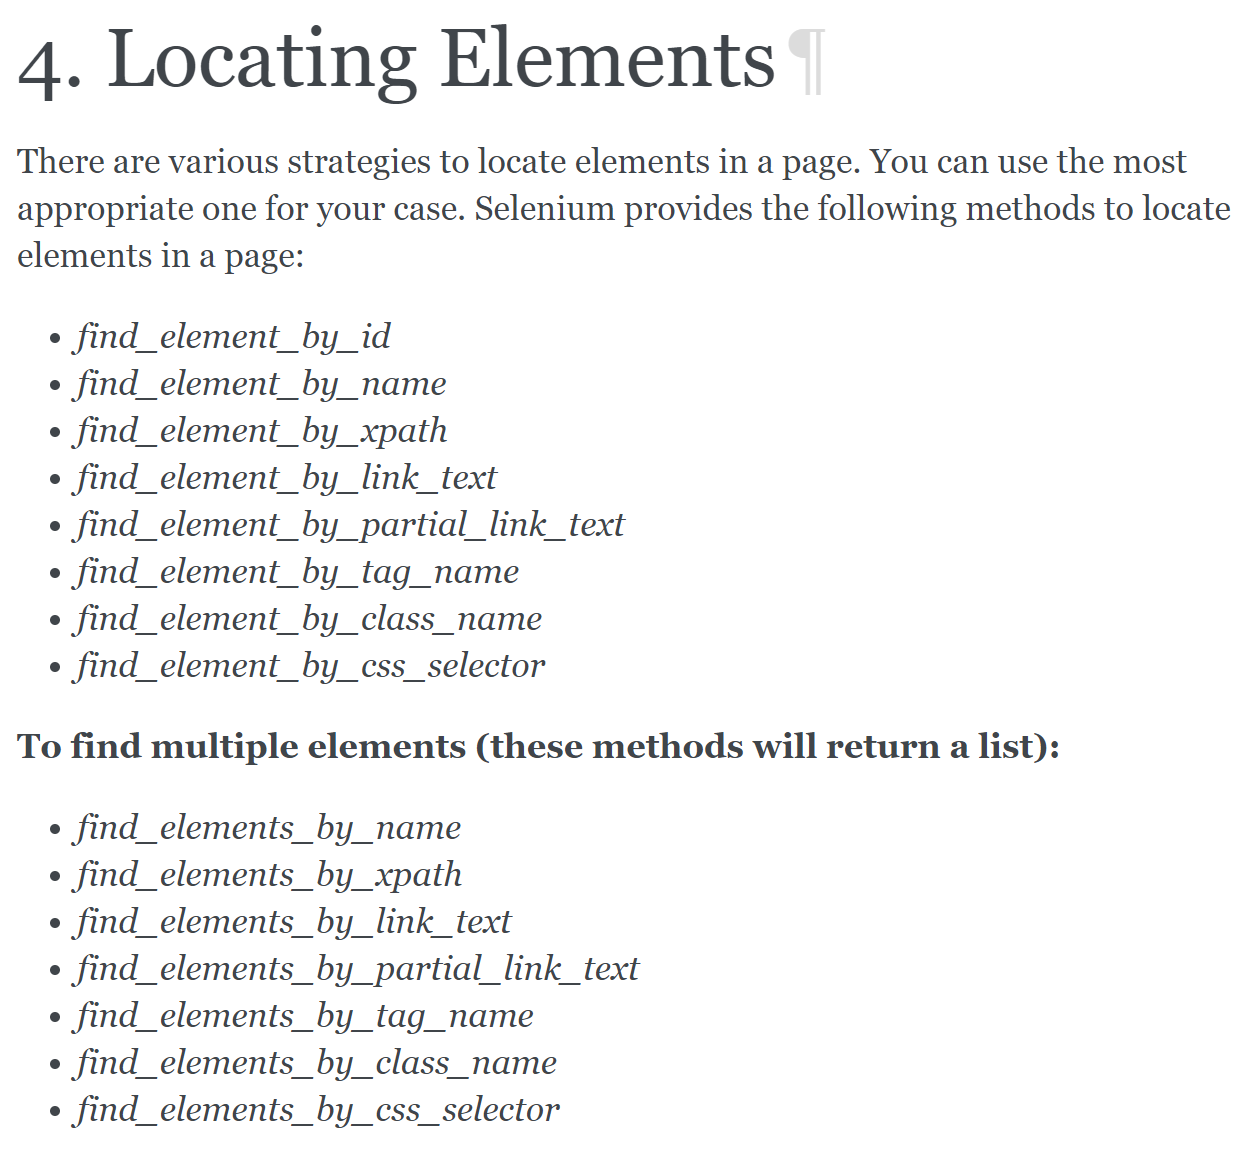

# Code here is for testing

## xpath

//*[@id="bodytext"]/ul[1]/li[2]/a[1]

//*[@id="bodytext"]/ul[2]/li[2]/a[1]

//*[@id="bodytext"]/ul[3]/li[2]/a[1]



In [3]:
# url we will be pulling data from
url = 'https://www.bls.gov/oes/tables.htm'

# create a Chrome session
driver = webdriver.Chrome("..\Advanced Project\chromedriver.exe")

#wait for the page to load, if nothing happens, throw an error, wait time is 10 second.
driver.implicitly_wait(10)

#load the web url into the Chrome Driver and get the webpage (go to the webpage)
driver.get(url)

#create black list to append records to
datalist = []

# need to define x 
x = 1

#the three xpaths above are what we search for: setting a condition to know when to break out of the loop
while x <= 3:

    #using the selenium find_element_by_xpath to search for the first unordered list 
    driver.find_element_by_xpath('//*[@id="bodytext"]/ul[{}]/li[2]/a[1]'.format(x)).send_keys(Keys.ENTER) #first link click

    #use the lxml parser to parse the current webpage, using BeautifulSoup
    soup_level1=BeautifulSoup(driver.page_source, 'lxml')

    #find all html tables on the website and store them in a variable table, the page has one large table with 1000+ rows.
    table = soup_level1.find_all('table')[0]

    #read the html in the table variable as a string and store it as a list  
    df = pd.read_html(str(table),header=0)

    #The webpage has two tables, we want the second table from the two df[1].  Each iteration append the new list to datalist.
    datalist.append(df[1])
    
    #After taking the list from the current webpage and storing it, go back one page to the original URL.
    driver.execute_script("window.history.go(-1)") 

    #Increase the while loop +1 for the next iter
    x += 1
    
#end the Selenium browser session after while loop condition x <= 3 is complete. 
driver.quit()

#combine all pandas dataframes in the list into one big dataframe
result = pd.concat([pd.DataFrame(datalist[i]) for i in range(len(datalist))],ignore_index=True)

#convert the pandas dataframe to JSON
json_records = result.to_json(orient='records')

#get current working directory
path = os.getcwd()

#open, write, and close the file
f = open(path + "\\test_salary_data.json","w")
f.write(json_records)
f.close()

In [4]:
#how long is the dataframe?
len(result)


3231

In [6]:
# custom function taken from https://stackoverflow.com/questions/12432663/what-is-a-clean-way-to-convert-a-string-percent-to-a-float
def p2f(x):
    return float(x.strip('%'))/100

result['Median hourly wage'] = result['Median hourly wage'].str.strip('$')
result['Mean hourly wage'] = result['Mean hourly wage'].str.strip('$')
result['Annual mean wage'] = result['Annual mean wage'].str.strip('$')


#df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [7]:
result

,Occupation code,Occupation title (click on the occupation title to view its profile),Level,Employment,Employment RSE,"Employment per 1,000 jobs",Median hourly wage,Mean hourly wage,Annual mean wage,Mean wage RSE
0,00-0000,All Occupations,total,144733270,0.1%,1000.000,18.58,24.98,"51,960",0.1%
1,11-0000,Management Occupations,major,7616650,0.2%,52.625,50.11,58.44,"121,560",0.1%
2,11-1000,Top Executives,minor,2535640,0.3%,17.519,49.73,61.66,"128,240",0.2%
3,11-1011,Chief Executives,detail,195530,0.7%,1.351,91.15,96.22,"200,140",0.5%
4,11-1021,General and Operations Managers,detail,2289770,0.3%,15.821,48.52,59.56,"123,880",0.2%
5,11-1031,Legislators,detail,50330,2.3%,0.348,(4),(4),"47,620",1.5%
6,11-2000,"Advertising, Marketing, Promotions, Public Rel...",minor,717220,0.5%,4.955,60.70,68.03,"141,500",0.3%
7,11-2011,Advertising and Promotions Managers,detail,25260,3.0%,0.175,56.31,63.99,"133,090",1.3%
8,11-2020,Marketing and Sales Managers,broad,619500,0.6%,4.280,61.59,68.75,"143,000",0.3%
9,11-2021,Marketing Managers,detail,240440,0.8%,1.661,64.56,70.79,"147,240",0.4%


https://docs.python.org/3/library/re.html

re.compile(pattern, flags=0)
Compile a regular expression pattern into a regular expression object, which can be used for matching using its match(), search() and other methods, described below.

The expression’s behaviour can be modified by specifying a flags value. Values can be any of the following variables, combined using bitwise OR (the | operator).

In [ ]:
#Beautiful Soup grabs all Job Title links
for link in soup_level1.find_all('a', id=re.compile("^MainContent_uxLevel2_JobTitles_uxJobTitleBtn_")):
    
    #Selenium visits each Job Title page
    python_button = driver.find_element_by_id('MainContent_uxLevel2_JobTitles_uxJobTitleBtn_' + str(x))
    python_button.click() #click link
    
    #Selenium hands of the source of the specific job page to Beautiful Soup
    soup_level2=BeautifulSoup(driver.page_source, 'lxml')

    #Beautiful Soup grabs the HTML table on the page
    table = soup_level2.find_all('table')[0]
    
    #Giving the HTML table to pandas to put in a dataframe object
    df = pd.read_html(str(table),header=0)
    
    #Store the dataframe in a list
    datalist.append(df[0])
    
    #Ask Selenium to click the back button
    driver.execute_script("window.history.go(-1)") 
    
    #increment the counter variable before starting the loop over
    x += 1
    
    #loop has completed

#end the Selenium browser session
driver.quit()


In [ ]:
#launch url
url = 'https://www.bls.gov/oes/tables.htm'
#url = 'https://www.bls.gov/oes/current/oes_nat.htm'
# create a Chrome session
driver = webdriver.Chrome("..\Advanced Project\chromedriver.exe")
#driver.implicitly_wait(10)
driver.set_page_load_timeout("10")

driver.get(url)

driver.find_element_by_xpath('//*[@id="bodytext"]/ul[1]/li[2]/a[1]').send_keys(Keys.ENTER) #first link click

driver.execute_script("window.history.go(-1)") 


#Selenium hands the page source to Beautiful Soup
soup_level1=BeautifulSoup(driver.page_source, 'lxml')

datalist = [] #empty list
x = 0 #counter
#Beautiful Soup grabs all Job Title links
for link in soup_level1.find_all('a', id=re.compile("^MainContent_uxLevel2_")):
    
    #Selenium visits each Job Title page
    python_button = driver.find_element_by_id('MainContent_uxLevel2_JobTitles_uxJobTitleBtn_' + str(x))
    python_button.click() #click link
    
    #Selenium hands of the source of the specific job page to Beautiful Soup
    soup_level1=BeautifulSoup(driver.page_source, 'lxml')

    #Beautiful Soup grabs the HTML table on the page
    table = soup_level2.find_all('table')[0]
    
    #Giving the HTML table to pandas to put in a dataframe object
    df = pd.read_html(str(table),header=0)
    
    #Store the dataframe in a list
    datalist.append(df[0])
    
    #Ask Selenium to click the back button
    driver.execute_script("window.history.go(-1)") 
    
    #increment the counter variable before starting the loop over
    x += 1